In [10]:
import pandas as pd

In [11]:
data = pd.read_csv("/home/bobo/Documents/Datasets/Binance_ETHUSDT_1h .csv")
data.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USDT,tradecount
0,2023-10-19 23:00:00,ETHUSDT,1564.22,1567.31,1563.70,1566.57,3403.8235,5.327189e+06,12103
1,2023-10-19 22:00:00,ETHUSDT,1563.45,1568.00,1563.39,1564.22,4833.0579,7.566292e+06,12073
2,2023-10-19 21:00:00,ETHUSDT,1566.51,1567.72,1563.39,1563.46,5240.2983,8.200644e+06,15157
3,2023-10-19 20:00:00,ETHUSDT,1568.00,1573.15,1563.72,1566.51,8725.2965,1.369178e+07,19124
4,2023-10-19 19:00:00,ETHUSDT,1561.66,1569.92,1561.20,1568.00,6092.9619,9.540306e+06,16003


In [12]:
len(data)

53988

In [13]:
# Check the data structure
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53988 entries, 0 to 53987
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         53988 non-null  object 
 1   Symbol       53988 non-null  object 
 2   Open         53988 non-null  float64
 3   High         53988 non-null  float64
 4   Low          53988 non-null  float64
 5   Close        53988 non-null  float64
 6   Volume ETH   53988 non-null  float64
 7   Volume USDT  53988 non-null  float64
 8   tradecount   53988 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 3.7+ MB
None


In [14]:
# Check for missing values
print(data.isnull().sum())

Date           0
Symbol         0
Open           0
High           0
Low            0
Close          0
Volume ETH     0
Volume USDT    0
tradecount     0
dtype: int64


In [15]:
# Optionally, see some basic statistics for numeric columns
print(data.describe())

               Open          High           Low         Close     Volume ETH  \
count  53988.000000  53988.000000  53988.000000  53988.000000   53988.000000   
mean    1175.631727   1183.056449   1167.680577   1175.651606   22923.639789   
std     1117.717598   1124.476871   1110.439730   1117.713576   27800.135759   
min       82.160000     82.950000     81.790000     82.170000       0.000000   
25%      231.600000    233.000000    230.205000    231.610000    7006.929360   
50%      687.525000    693.905000    680.025000    687.510000   14594.333610   
75%     1815.000000   1822.552500   1807.150000   1814.967500   28549.662597   
max     4846.940000   4868.000000   4833.190000   4846.710000  493227.882820   

        Volume USDT     tradecount  
count  5.398800e+04   53988.000000  
mean   2.932994e+07   22455.101448  
std    4.927431e+07   29008.056595  
min    0.000000e+00       0.000000  
25%    2.484969e+06    5101.750000  
50%    9.415546e+06   12335.500000  
75%    3.839972e+07 

In [19]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# Verify the conversion
print(data['Date'].head())
print(data.info())

0   2023-10-19 23:00:00
1   2023-10-19 22:00:00
2   2023-10-19 21:00:00
3   2023-10-19 20:00:00
4   2023-10-19 19:00:00
Name: Date, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53988 entries, 0 to 53987
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         53348 non-null  datetime64[ns]
 1   Symbol       53988 non-null  object        
 2   Open         53988 non-null  float64       
 3   High         53988 non-null  float64       
 4   Low          53988 non-null  float64       
 5   Close        53988 non-null  float64       
 6   Volume ETH   53988 non-null  float64       
 7   Volume USDT  53988 non-null  float64       
 8   tradecount   53988 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 3.7+ MB
None


In [20]:
invalid_rows = data[data['Date'].isna()]
print(invalid_rows)

      Date   Symbol     Open     High      Low    Close  Volume ETH  \
49328  NaT  ETHUSDT   858.80   861.36   850.30   853.50  2688.93918   
49329  NaT  ETHUSDT   863.54   865.50   858.34   858.35  1521.66768   
49330  NaT  ETHUSDT   872.02   875.00   862.50   864.39  1410.23891   
49331  NaT  ETHUSDT   869.60   874.99   868.70   872.51  1599.48261   
49332  NaT  ETHUSDT   866.00   870.00   865.31   869.60   835.92342   
...    ...      ...      ...      ...      ...      ...         ...   
49963  NaT  ETHUSDT  1140.00  1154.72  1130.18  1152.51  3899.48396   
49964  NaT  ETHUSDT  1150.51  1164.99  1125.01  1140.00  7622.31840   
49965  NaT  ETHUSDT  1134.07  1154.99  1134.07  1150.50  4828.74525   
49966  NaT  ETHUSDT  1132.00  1140.89  1125.01  1135.00  4149.14991   
49967  NaT  ETHUSDT  1125.96  1137.99  1120.56  1132.00  3465.84651   

        Volume USDT  tradecount  
49328  2.298593e+06        5220  
49329  1.311030e+06        3149  
49330  1.226549e+06        3617  
49331  1.39

In [21]:
# Load your data (assuming it's already read into the `data` DataFrame)

# Step 1: Identify rows where 'Date' is missing
missing_rows = data['Date'].isna()

# Step 2: Forward-fill datetime values for missing rows
# Find the last valid datetime before the NaTs
last_valid_datetime = data['Date'].ffill().iloc[0]

# Generate new datetime values for rows with missing dates
data.loc[missing_rows, 'Date'] = pd.date_range(
    start=last_valid_datetime, 
    periods=missing_rows.sum() + 1,  # Include the valid one
    freq='H'
)[1:]  # Skip the first value as it's already filled

# Verify the result
print(data)

                     Date   Symbol     Open     High      Low    Close  \
0     2023-10-19 23:00:00  ETHUSDT  1564.22  1567.31  1563.70  1566.57   
1     2023-10-19 22:00:00  ETHUSDT  1563.45  1568.00  1563.39  1564.22   
2     2023-10-19 21:00:00  ETHUSDT  1566.51  1567.72  1563.39  1563.46   
3     2023-10-19 20:00:00  ETHUSDT  1568.00  1573.15  1563.72  1566.51   
4     2023-10-19 19:00:00  ETHUSDT  1561.66  1569.92  1561.20  1568.00   
...                   ...      ...      ...      ...      ...      ...   
53983 2017-08-17 08:00:00  ETHUSDT   307.95   309.97   307.00   308.62   
53984 2017-08-17 07:00:00  ETHUSDT   302.68   307.96   302.60   307.96   
53985 2017-08-17 06:00:00  ETHUSDT   302.40   304.44   301.90   302.68   
53986 2017-08-17 05:00:00  ETHUSDT   301.61   303.28   300.00   303.10   
53987 2017-08-17 04:00:00  ETHUSDT   301.13   302.57   298.00   301.61   

       Volume ETH   Volume USDT  tradecount  
0      3403.82350  5.327189e+06       12103  
1      4833.05790  

/tmp/ipykernel_40459/3991426218.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.loc[missing_rows, 'Date'] = pd.date_range(


In [22]:
data.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USDT,tradecount
0,2023-10-19 23:00:00,ETHUSDT,1564.22,1567.31,1563.70,1566.57,3403.8235,5.327189e+06,12103
1,2023-10-19 22:00:00,ETHUSDT,1563.45,1568.00,1563.39,1564.22,4833.0579,7.566292e+06,12073
2,2023-10-19 21:00:00,ETHUSDT,1566.51,1567.72,1563.39,1563.46,5240.2983,8.200644e+06,15157
3,2023-10-19 20:00:00,ETHUSDT,1568.00,1573.15,1563.72,1566.51,8725.2965,1.369178e+07,19124
4,2023-10-19 19:00:00,ETHUSDT,1561.66,1569.92,1561.20,1568.00,6092.9619,9.540306e+06,16003


In [23]:
# Step 1: Set 'Date' as the index
data.set_index('Date', inplace=True)

# Step 2: Sort the DataFrame by the index to ensure it starts with the earliest date
data.sort_index(ascending=True, inplace=True)

# Verify the result
print(data.head())

                      Symbol    Open    High    Low   Close  Volume ETH  \
Date                                                                      
2017-08-17 04:00:00  ETHUSDT  301.13  302.57  298.0  301.61   125.66877   
2017-08-17 05:00:00  ETHUSDT  301.61  303.28  300.0  303.10   377.67246   
2017-08-17 06:00:00  ETHUSDT  302.40  304.44  301.9  302.68   303.86672   
2017-08-17 07:00:00  ETHUSDT  302.68  307.96  302.6  307.96   754.74510   
2017-08-17 08:00:00  ETHUSDT  307.95  309.97  307.0  308.62   150.75029   

                       Volume USDT  tradecount  
Date                                            
2017-08-17 04:00:00   37684.804181         129  
2017-08-17 05:00:00  114043.282676         202  
2017-08-17 06:00:00   92034.441294         182  
2017-08-17 07:00:00  229725.136967         198  
2017-08-17 08:00:00   46559.462371         182  


In [24]:
# Define a function to identify outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in key columns
columns_to_check = ['Open', 'High', 'Low', 'Close', 'Volume ETH', 'Volume USDT']
outlier_info = {}
for col in columns_to_check:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    outlier_info[col] = {
        "count": len(outliers),
        "lower_bound": lower,
        "upper_bound": upper,
        "outliers": outliers
    }
    print(f"Column: {col}")
    print(f"Outlier count: {len(outliers)}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}\n")

# Focus on a small area around some outliers
example_outliers = outlier_info['Open']['outliers']
if not example_outliers.empty:
    idx = example_outliers.index[:5]  # Select a few outliers
    print(data.loc[idx])

Column: Open
Outlier count: 874
Lower Bound: -2143.5000000000005, Upper Bound: 4190.1

Column: High
Outlier count: 899
Lower Bound: -2151.32875, Upper Bound: 4206.88125

Column: Low
Outlier count: 848
Lower Bound: -2135.2125000000005, Upper Bound: 4172.567500000001

Column: Close
Outlier count: 874
Lower Bound: -2143.42625, Upper Bound: 4190.00375

Column: Volume ETH
Outlier count: 3783
Lower Bound: -25307.170496249993, Upper Bound: 60863.762453749994

Column: Volume USDT
Outlier count: 4050
Lower Bound: -51387157.8973515, Upper Bound: 92271847.2830553

                      Symbol     Open     High      Low    Close   Volume ETH  \
Date                                                                            
2021-05-12 01:00:00  ETHUSDT  4195.32  4195.60  4146.62  4176.00  28653.02915   
2021-05-12 03:00:00  ETHUSDT  4268.51  4351.85  4246.16  4332.81  62295.95735   
2021-05-12 04:00:00  ETHUSDT  4332.12  4348.00  4273.35  4300.80  49459.61478   
2021-05-12 05:00:00  ETHUSDT  4300.

In [25]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)  # Clip to zero
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Re-run outlier detection for key columns
outlier_info = {}
columns_to_check = ['Open', 'High', 'Low', 'Close', 'Volume ETH', 'Volume USDT']
for col in columns_to_check:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    outlier_info[col] = {
        "count": len(outliers),
        "lower_bound": lower,
        "upper_bound": upper,
        "outliers": outliers
    }
    print(f"Column: {col}")
    print(f"Outlier count: {len(outliers)}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}\n")


Column: Open
Outlier count: 874
Lower Bound: 0, Upper Bound: 4190.1

Column: High
Outlier count: 899
Lower Bound: 0, Upper Bound: 4206.88125

Column: Low
Outlier count: 848
Lower Bound: 0, Upper Bound: 4172.567500000001

Column: Close
Outlier count: 874
Lower Bound: 0, Upper Bound: 4190.00375

Column: Volume ETH
Outlier count: 3783
Lower Bound: 0, Upper Bound: 60863.762453749994

Column: Volume USDT
Outlier count: 4050
Lower Bound: 0, Upper Bound: 92271847.2830553



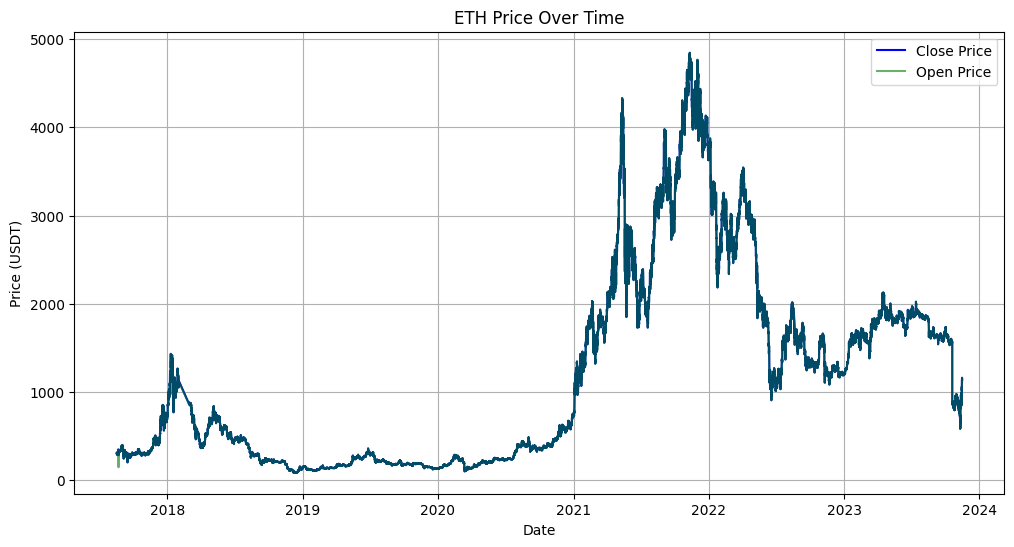

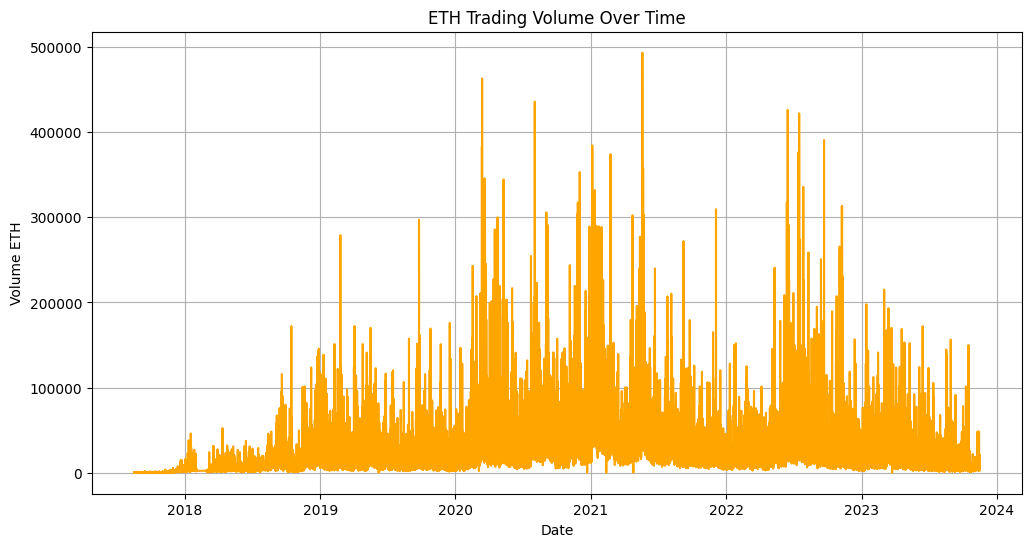

In [28]:
import matplotlib.pyplot as plt

# Line plot for price trends
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['Open'], label='Open Price', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.title('ETH Price Over Time')
plt.legend()
plt.grid()
plt.show()

# Line plot for trading volumes
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Volume ETH'], label='Volume (ETH)', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume ETH')
plt.title('ETH Trading Volume Over Time')
plt.grid()
plt.show()

2. Distributions of Key Variables

Visualize the distribution of prices, volumes, and trade counts to understand their spread and skewness.
Common Visualizations:

    Histograms: Show frequency distribution of Close, Volume ETH, Volume USDT, etc.
    Kernel Density Estimate (KDE): Smooth visualization of distribution.

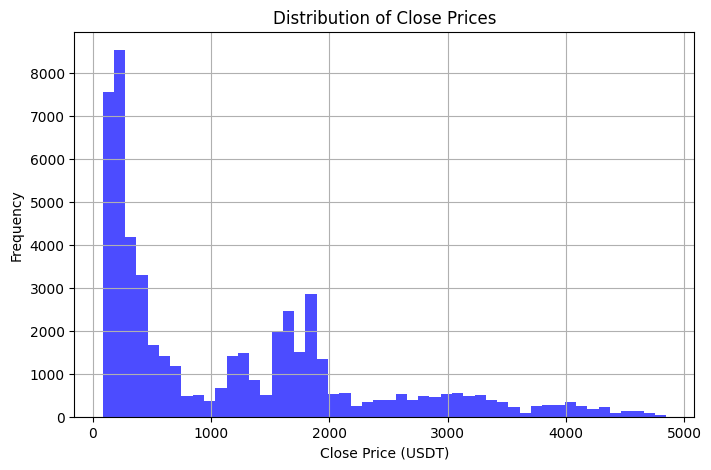

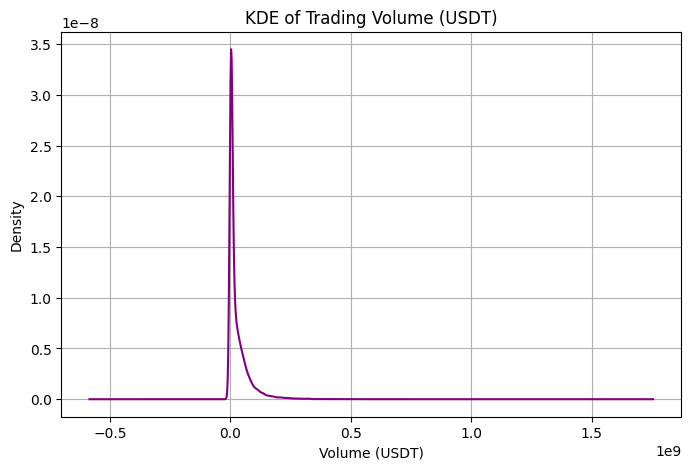

In [29]:
# Histogram for Close Price
plt.figure(figsize=(8, 5))
plt.hist(data['Close'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Close Price (USDT)')
plt.ylabel('Frequency')
plt.title('Distribution of Close Prices')
plt.grid()
plt.show()

# KDE for Volume USDT
plt.figure(figsize=(8, 5))
data['Volume USDT'].plot(kind='kde', color='purple')
plt.xlabel('Volume (USDT)')
plt.title('KDE of Trading Volume (USDT)')
plt.grid()
plt.show()

3. Relationships Between Variables

Visualizing relationships helps understand how variables interact.
Common Visualizations:

    Scatter Plots:
        Compare Volume ETH with Close Price to see if higher trading volumes coincide with price changes.
    Correlation Heatmaps:
        Understand relationships among Open, High, Low, Close, Volume ETH, and tradecount.

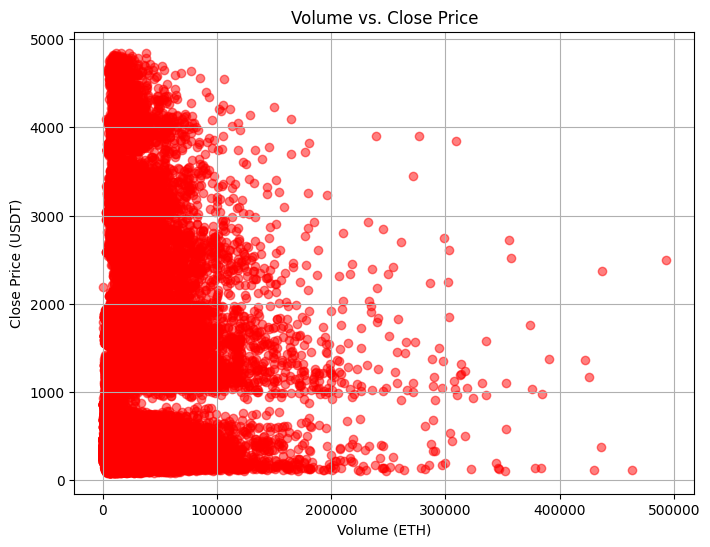

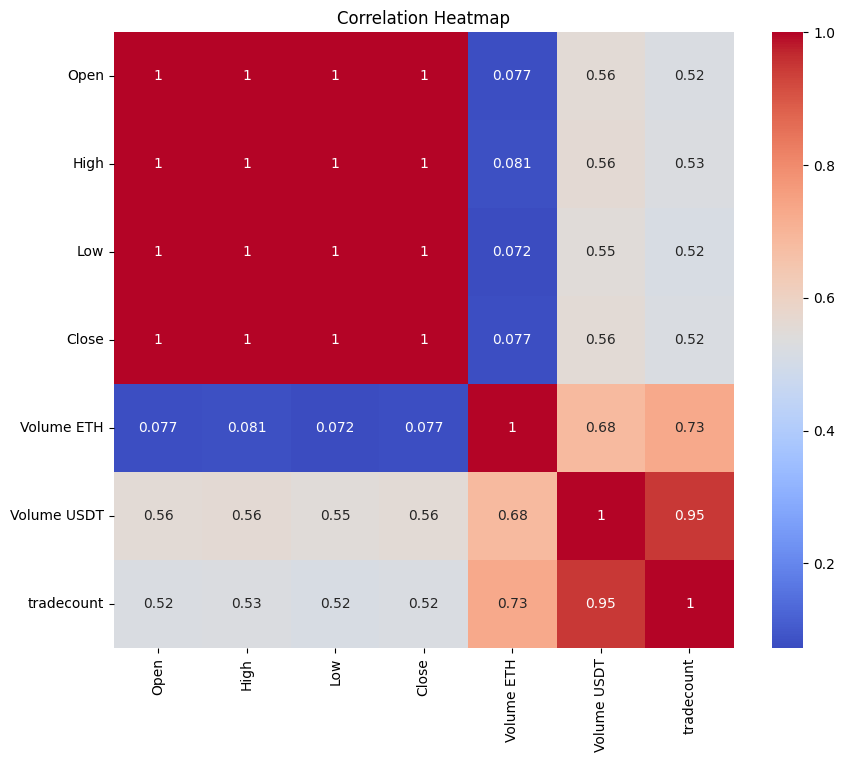

In [30]:
import seaborn as sns

# Scatter plot for Volume vs. Close Price
plt.figure(figsize=(8, 6))
plt.scatter(data['Volume ETH'], data['Close'], alpha=0.5, color='red')
plt.xlabel('Volume (ETH)')
plt.ylabel('Close Price (USDT)')
plt.title('Volume vs. Close Price')
plt.grid()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume ETH', 'Volume USDT', 'tradecount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
